In [1]:
import os
import cv2
import keras
import imageio
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from glob import glob
%matplotlib inline

In [2]:
all_labels = pd.read_csv('D:\GP\skin cancer\PAD-UFES-2\metadata.csv')

In [3]:
all_labels.head()

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True


In [56]:
#White hair removal
def RemoveWhiteHair(img):
    
    #Convert the original image to grayscale
    grayscale = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    #create structural element for morphological filtering
    structural_element = cv2.getStructuringElement(1,(100,100))

    #Perform top-hat filtering on the grayscale image to find hair/marking contours
    tophat = cv2.morphologyEx(grayscale, cv2.MORPH_TOPHAT, structural_element)

    #intensify the contours in preparation for the inpainting algorithm
    ret,thresh2 = cv2.threshold(tophat,8,255,cv2.THRESH_BINARY)

    #inpaint (image interpolation) the original image depending on the mask
    image = cv2.inpaint(img,thresh2,1,cv2.INPAINT_TELEA)
    
    return image

In [57]:
#Black hair removal
def RemoveBlackHair(img):
    
    #Convert the original image to grayscale
    grayscale = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    #create structural element for morphological filtering
    structural_element = cv2.getStructuringElement(1,(100,100))

    #Perform black top-hat filtering on the grayscale image to find hair/marking contours
    blackhat = cv2.morphologyEx(grayscale, cv2.MORPH_BLACKHAT, structural_element)

    #intensify the contours in preparation for the inpainting algorithm
    ret,thresh2 = cv2.threshold(blackhat,6,255,cv2.THRESH_BINARY)

    #inpaint (image interpolation) the original image depending on the mask
    image = cv2.inpaint(img,thresh2,1,cv2.INPAINT_TELEA)
    
    return image

In [58]:
def preprocessing(name):
    img = image.load_img(r"D:\\GP\\skin cancer\\PAD-UFES-2\\images\\" + name)
    pic = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    #img = data
    img = img_to_array(img).astype(np.uint8)
    
    #remove white hair
    img = RemoveWhiteHair(img)
    
    #remove black hair
    img = RemoveBlackHair(img)

    img = image.img_to_array(img)

    #save the newly processed image
    imageio.imwrite("D:\\GP\\skin cancer\\PreUpdated\\" + name , img)
    return img

In [ ]:
for i in tqdm_notebook(all_labels['img_id']):
    preprocessing(i)

In [ ]:
filelist = glob("D:\\GP\\skin cancer\\PreUpdated\\*_*.png")
len(filelist)

In [ ]:
#compare original images with pre-processed images
plt.figure(figsize = (15,20))
count = 1
for img_id in image_ids[:5]:
    img = load_img("D:\\GP\\skin cancer\\PAD-UFES-2\\images\\"+ img_id)
    plt.subplot(5,2, count)
    plt.imshow(img)
    plt.title('Original Image', fontsize=11)

    img = load_img("D:\\GP\\skin cancer\\PreUpdated\\"+ img_id)
    plt.subplot(5,2, count+1)
    plt.imshow(img)
    plt.title('Preprocessed Image', fontsize=11)
    
    count = count + 2

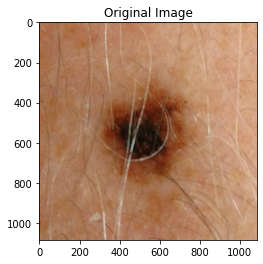

In [30]:
plt.subplot()
plt.title('Original Image')
plt.imshow(pic)

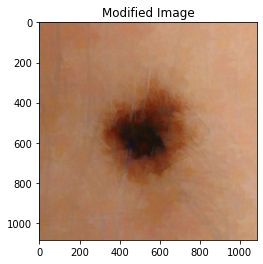

In [60]:
plt.subplot()
plt.title('Modified Image')
plt.imshow(img)